**To visualize weights from a trained YOLO Model**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### clone the repo

In [ ]:
!git clone https://github.com/david8862/keras-YOLOv3-model-set.git

Cloning into 'keras-YOLOv3-model-set'...
remote: Enumerating objects: 3727, done.
remote: Counting objects: 100% (234/234), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 3727 (delta 126), reused 188 (delta 96), pack-reused 3493
Receiving objects: 100% (3727/3727), 27.13 MiB | 32.11 MiB/s, done.
Resolving deltas: 100% (2613/2613), done.


### copy the weights and the cfg file using during training

In [ ]:
!cp /content/gdrive/MyDrive/yolo_3rd_run/backup/yolov3-custom_3000.weights \
/content/keras-YOLOv3-model-set/weights

!cp /content/gdrive/MyDrive/yolo_3rd_run/yolov3-custom.cfg \
/content/keras-YOLOv3-model-set/cfg

### change cwd and run the script 

In [ ]:
%cd /content/keras-YOLOv3-model-set

/content/keras-YOLOv3-model-set


### for 1 channel image change the tools/model_converter/convert.py 117 and 119 to channels =1

In [ ]:
!python tools/model_converter/convert.py cfg/yolov3-custom.cfg \
weights/yolov3-custom_3000.weights weights/yolov3_rgb.h5

Loading weights.
Weights Header:  0 2 5 [192000]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 1, 32)
2021-10-02 08:21:58.258527: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-02 08:21:58.258582: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (71b14202e17e): /proc/driver/nvidia/version does not exist
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convo

In [ ]:
def read_hdf5(path):

    weights = {}

    keys = []
    with h5py.File(path, 'r') as f: # open file
        f.visit(keys.append) # append all keys to list
        for key in keys:
            if ':' in key: # contains data if ':' in key
                #print(f[key].name)
                weights[f[key].name] = f[key][()]
    return weights ,keys

In [ ]:
import h5py
filename = "/content/keras-YOLOv3-model-set/weights/yolov3_rgb.h5"
# f = h5py.File(filename,'r')
# f.keys()
dict_info, layers_name = read_hdf5(filename)

In [ ]:
wts1 = dict_info['/model_weights/conv2d/conv2d/kernel:0']
wts2 = dict_info['/model_weights/conv2d_1/conv2d_1/kernel:0']
wts3 = dict_info['/model_weights/conv2d_2/conv2d_2/kernel:0']
wts4 = dict_info['/model_weights/conv2d_3/conv2d_3/kernel:0']
wts5 = dict_info['/model_weights/conv2d_4/conv2d_4/kernel:0']
wts6 = dict_info['/model_weights/conv2d_5/conv2d_5/kernel:0']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


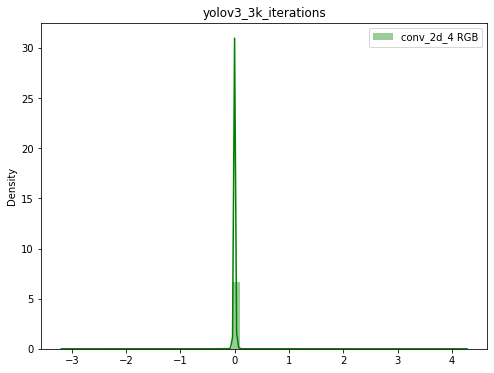

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.distplot(wts5.flatten(),label = 'conv_2d_4 RGB',color = 'green')
plt.legend()
plt.title('yolov3_3k_iterations')
plt.show()